In [232]:
#import Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [233]:
#read file
df=pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv')

In [234]:
#get the shape of original dataframe
df.shape

(270, 7)

In [235]:
#check null values
df.isnull().sum()

Sno                         0
Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
dtype: int64

In [236]:
#glance few rows
df.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


In [237]:
#create new date frame
df_new=df.groupby(['Date'],sort=False,as_index=False).sum()

In [238]:
#add total_cases column in newly created dataframe
df_new['total_cases']=df_new[['ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths']].sum(axis=1)


Text(0.5, 1.0, 'total cases')

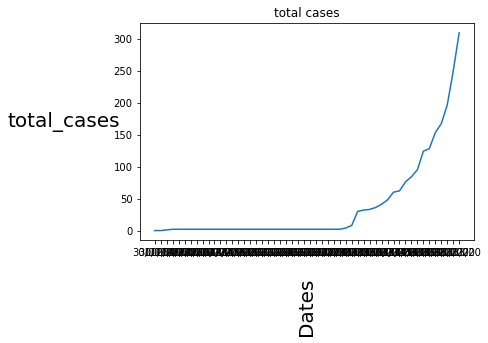

In [240]:
#plotting total_cases v/s Date
x=df_new['Date']
y=df_new['total_cases']


plt.plot(x,y)
plt.xlabel('Dates',rotation=90, fontsize=20, labelpad=20)
plt.ylabel('total_cases',rotation=0, fontsize=20, labelpad=50)
plt.title('total cases')


In [243]:
#find out Rate of increase of cases each day
i=1
for i in range(len(df_new)-1):
    current_day_case=df_new.loc[i].at['total_cases']
    #df_new.loc[i,'current_day_case']=current_day_case
    next_day_case=df_new.loc[i+1].at['total_cases']
    #df_new.loc[i,'next_day_case']=next_day_case
    increase_rate=(next_day_case-current_day_case)/current_day_case
    #print(current_day_case,next_day_case,increase_rate)
    #increase_rate.append=increase_rate
    df_new.loc[i,'increase_rate']=increase_rate
#print(df_new[['current_day_case','next_day_case','increase_rate']])
    

In [251]:
#task is to get the r only from 4th march to 21st march
r=df_new.iloc[34: ,7:8].mean()
print(r)

increase_rate    0.148148
dtype: float64


In [252]:
#Calculate exponential function of increse rate
P_o=31
t=26
tr=t*r
ex_tr=np.exp(tr)
P_t=P_o*ex_tr
print(P_t)

increase_rate    1459.481028
dtype: float64
